In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [68]:
df= pd.read_csv("/content/telecom_churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
df.isnull().sum()

,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


In [ ]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3328,False
3329,False
3330,False
3331,False


<Axes: xlabel='CustServCalls', ylabel='count'>

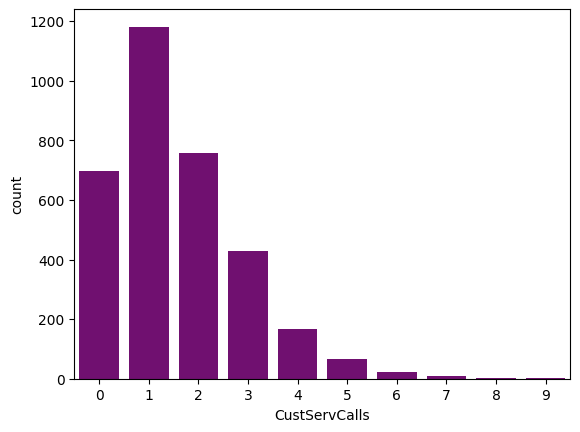

In [73]:
sns.countplot(x=df['CustServCalls'],color='purple')

<Axes: xlabel='DataPlan', ylabel='count'>

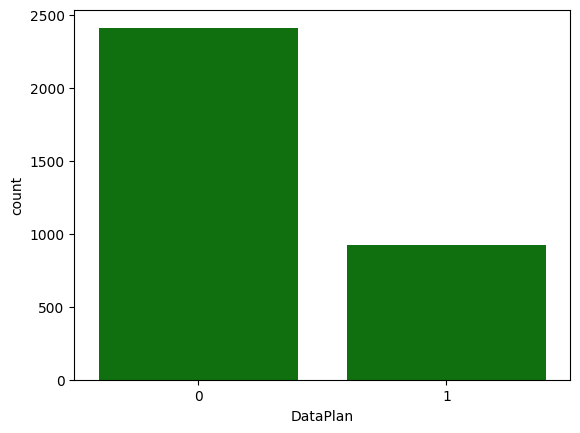

In [72]:
sns.countplot(x=df['DataPlan'],color='green')

<Axes: xlabel='DayCalls', ylabel='Count'>

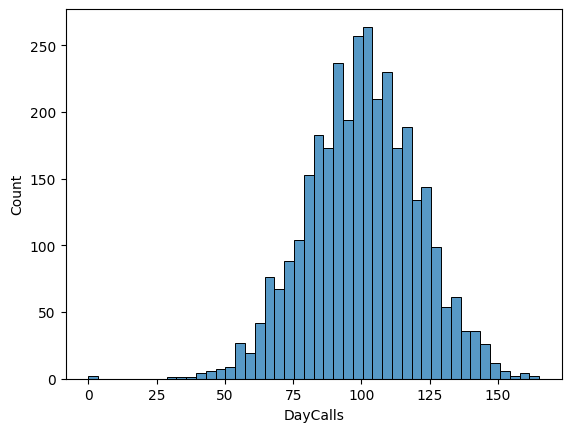

In [ ]:
sns.histplot(x=df['DayCalls'])

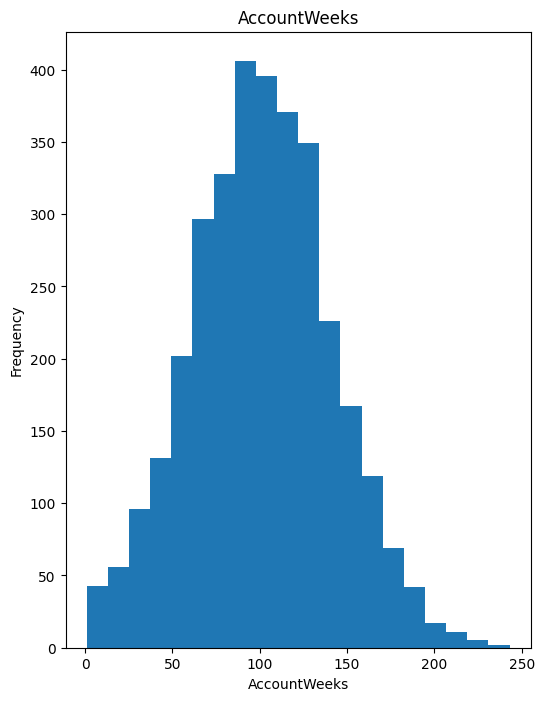

In [ ]:
plt.figure(figsize=(6,8))
df['AccountWeeks'].plot(kind='hist',bins=20)
plt.title('AccountWeeks')
plt.xlabel('AccountWeeks')
plt.ylabel('Frequency')
plt.show()

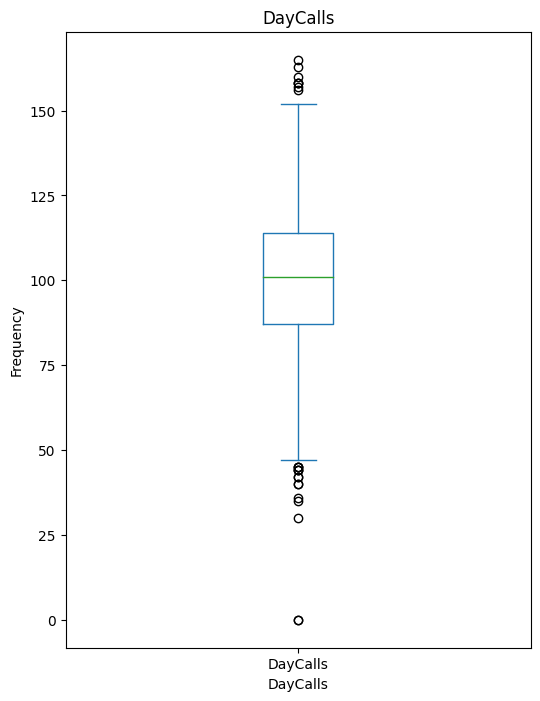

In [ ]:
plt.figure(figsize=(6,8))
df['DayCalls'].plot(kind='box')
plt.title('DayCalls')
plt.xlabel('DayCalls')
plt.ylabel('Frequency')
plt.show()

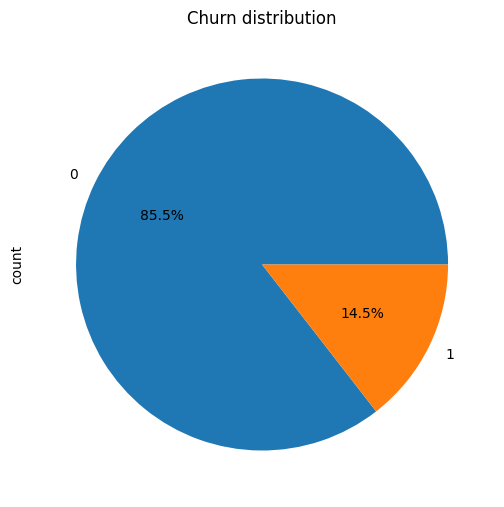

In [ ]:
plt.figure(figsize=(6,8))
df['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Churn distribution')
plt.show()

In [57]:
x=df.drop('Churn',axis=1)
y=df['Churn']


In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_pred=logistic_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [77]:
accuracy,precision,recall,f1

(0.8470764617691154,
 0.4838709677419355,
 0.1485148514851485,
 0.22727272727272727)

In [64]:
result=pd.dfFrame({'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'F1':[f1]})
result

,Accuracy,Precision,Recall,F1
0,0.847076,0.483871,0.148515,0.227273


In [65]:
confusion=  confusion_matrix(y_test,y_pred)
confusion

array([[550,  16],
       [ 86,  15]])

In [66]:
classification=classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.86      0.97      0.92       566
           1       0.48      0.15      0.23       101

    accuracy                           0.85       667
   macro avg       0.67      0.56      0.57       667
weighted avg       0.81      0.85      0.81       667

